In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf

In [118]:
import sys
sys.path.append("../..")

import matplotlib_utils
from importlib import reload
reload(matplotlib_utils)

import keras_utils
from keras_utils import reset_tf_session

In [138]:
import preprocessed_mnist
X_train, y_train, X_val, y_val, X_test, y_test = preprocessed_mnist.load_dataset_from_file()

X_train [shape (50000, 28, 28)] sample patch:
 [[ 0.          0.29803922  0.96470588  0.98823529  0.43921569]
 [ 0.          0.33333333  0.98823529  0.90196078  0.09803922]
 [ 0.          0.33333333  0.98823529  0.8745098   0.        ]
 [ 0.          0.33333333  0.98823529  0.56862745  0.        ]
 [ 0.          0.3372549   0.99215686  0.88235294  0.        ]]
A closeup of a sample patch:


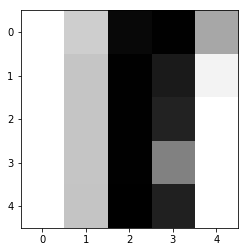

And the whole sample:


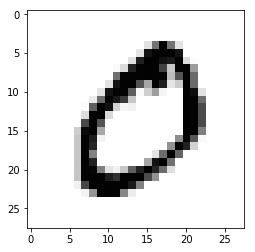

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

In [121]:
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])
y_train

In [122]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [123]:
import keras

y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(50000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]] [5 0 4]


In [ ]:
'''USING LINEAR MODEL'''

In [124]:
s = reset_tf_session()

In [125]:
W = tf.get_variable("W", shape = (784,10), dtype = tf.float32, trainable = True)
b = tf.get_variable("b", shape = (1,10), dtype = tf.float32, trainable = True)

In [126]:
input_X = tf.placeholder(tf.float32, shape = (None, 784))
input_y = tf.placeholder(tf.int32, shape = (None,10))

In [127]:
logits = input_X @ W + b
probas = tf.nn.softmax(logits) 
classes = tf.argmax(probas,axis = 1)

loss = tf.nn.softmax_cross_entropy_with_logits(labels = input_y, logits = logits) ### cross-entropy loss

optimizer = tf.train.AdamOptimizer()
step = optimizer.minimize(loss)

In [128]:
s.run(tf.global_variables_initializer())

BATCH_SIZE = 512
EPOCHS = 40

simpleTrainingCurves = matplotlib_utils.SimpleTrainingCurves("cross-entropy", "accuracy")

for epoch in range(EPOCHS): 
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):  
        _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                             input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
        batch_losses.append(batch_loss)
    
    batch_losses[-1] = np.array(list(batch_losses[-1]) + list(np.zeros((176,))))
    train_loss = np.mean(batch_losses)
    val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh}
    val_loss = np.mean(val_loss)
    train_accuracy = accuracy_score(y_train, s.run(classes, {input_X: X_train_flat}))
    valid_accuracy = accuracy_score(y_val, s.run(classes, {input_X: X_val_flat}))  

In [ ]:
'''USING MLP''' 

In [130]:
s = reset_tf_session()
input_X = tf.placeholder(tf.float32, shape = (None, 784))
input_y = tf.placeholder(tf.int32, shape = (None,10))

In [134]:
hidden_1 = tf.layers.dense(input_X , 256, activation = tf.nn.sigmoid)
hidden_2 = tf.layers.dense(hidden_1, 256, activation = tf.nn.sigmoid)
logits = tf.layers.dense(hidden_2, 10)
probas = tf.layers.dense(hidden_2, 10, activation = tf.nn.sigmoid)
classes = tf.argmax(probas, axis = 1)
loss = tf.nn.softmax_cross_entropy_with_logits(labels = input_y, logits = logits)
optimizer = tf.train.AdamOptimizer()
step = optimizer.minimize(loss)

In [135]:
s.run(tf.global_variables_initializer())

BATCH_SIZE = 512
EPOCHS = 40

simpleTrainingCurves = matplotlib_utils.SimpleTrainingCurves("cross-entropy", "accuracy")

for epoch in range(EPOCHS):  
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):  
        _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                             input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
        
        batch_losses.append(batch_loss)
    
    batch_losses[-1] = np.array(list(batch_losses[-1]) + list(np.zeros((176,))))
    train_loss = np.mean(batch_losses)
    val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})  # this part is usually small
    val_loss = np.mean(val_loss)
    train_accuracy = accuracy_score(y_train, s.run(classes, {input_X: X_train_flat}))  # this is slow and usually skipped
    valid_accuracy = accuracy_score(y_val, s.run(classes, {input_X: X_val_flat}))  